## Import libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset preparation

Load data

In [8]:
red_wine_path = './Dataset/wine+quality/winequality-red.csv'
white_wine_path = './Dataset/wine+quality/winequality-white.csv'

# Load winequality-red.csv và winequality-white.csv
wine_columns = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'
]
red_wine = pd.read_csv(red_wine_path, sep=';', skiprows=1, names=wine_columns)
white_wine = pd.read_csv(white_wine_path, sep=';', skiprows=1, names=wine_columns)

# Thêm cột wine_type
red_wine['wine_type'] = 0  # Red
white_wine['wine_type'] = 1  # White

# Gộp dataset
wine_combined = pd.concat([red_wine, white_wine], ignore_index=True)

# Nhóm chất lượng thành 3 lớp
bins = [0, 4, 6, 10]  # Khoảng: Low (0-4), Standard (5-6), High (7-10)
labels = [0, 1, 2]  # 0: Low, 1: Standard, 2: High
wine_combined['quality'] = pd.cut(wine_combined['quality'], bins=bins, labels=labels, include_lowest=True)

# Preprocess
X_wine = wine_combined.drop('quality', axis=1)  # Features, bao gồm wine_type
y_wine = wine_combined['quality'].astype(int)  # Target

# Scale features
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# In thông tin
print("Combined Wine Quality - Features head:\n", X_wine.head())
print("Combined Wine Quality - Features shape:", X_wine_scaled.shape)
print("Combined Wine Quality - Target shape:", y_wine.shape)
print("Combined Wine Quality - Target value counts:\n", y_wine.value_counts())

Combined Wine Quality - Features head:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  wine_type  
0      9.4          0 

Data Exploration

In [9]:
wine_combined.describe()
wine_combined.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Split proportions and perform

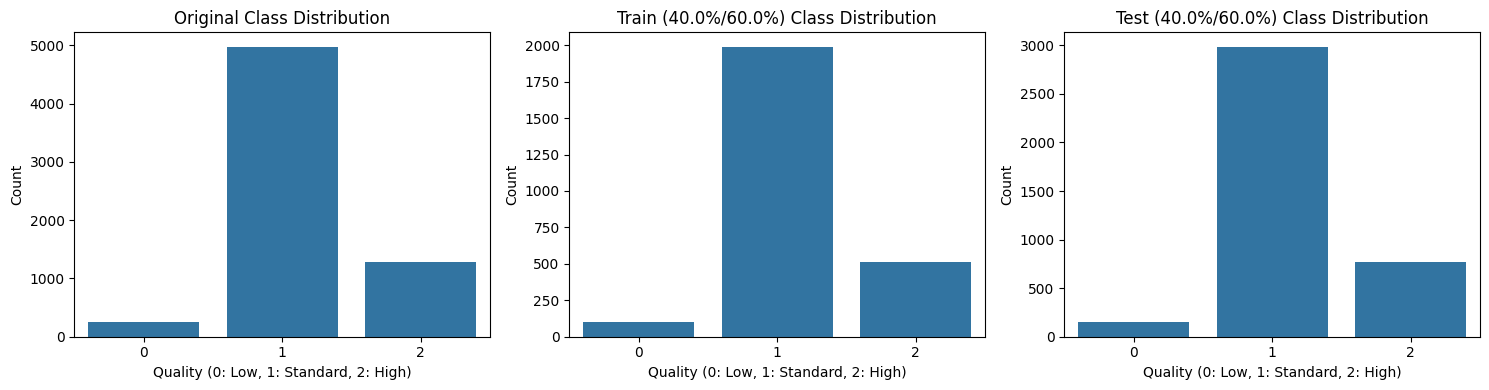


Proportions for 40.0%/60.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.558891
2    19.668976
0     3.772132
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.558092
2    19.646063
0     3.795845
Name: proportion, dtype: float64


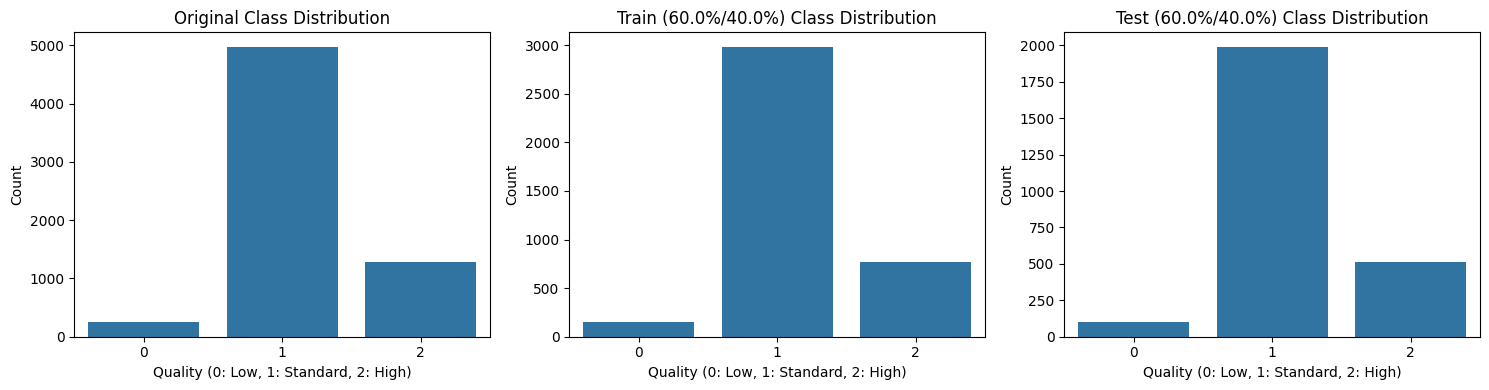


Proportions for 60.0%/40.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.552078
2    19.651103
0     3.796819
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.567911
2    19.661408
0     3.770681
Name: proportion, dtype: float64


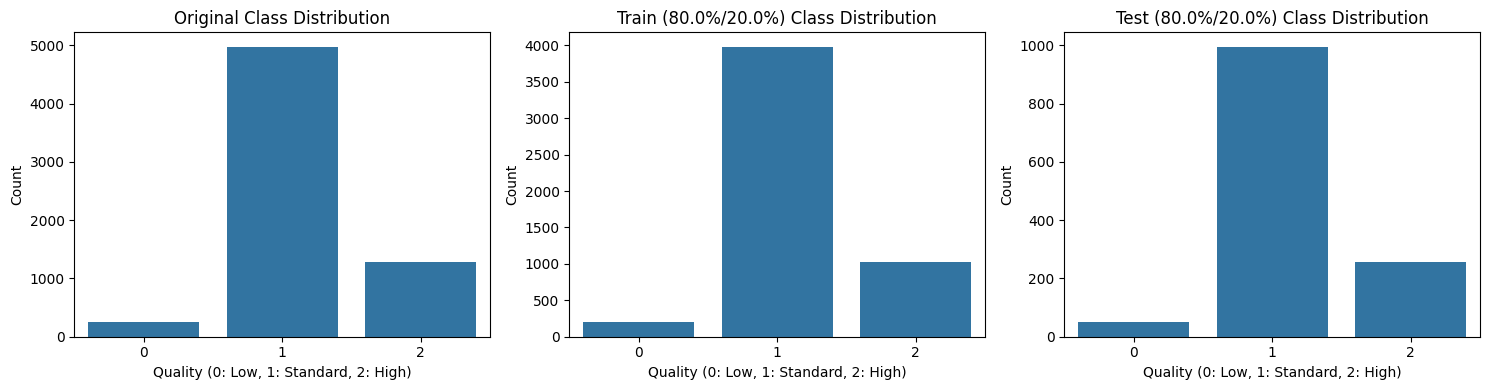


Proportions for 80.0%/20.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.563402
2    19.645950
0     3.790648
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.538462
2    19.692308
0     3.769231
Name: proportion, dtype: float64


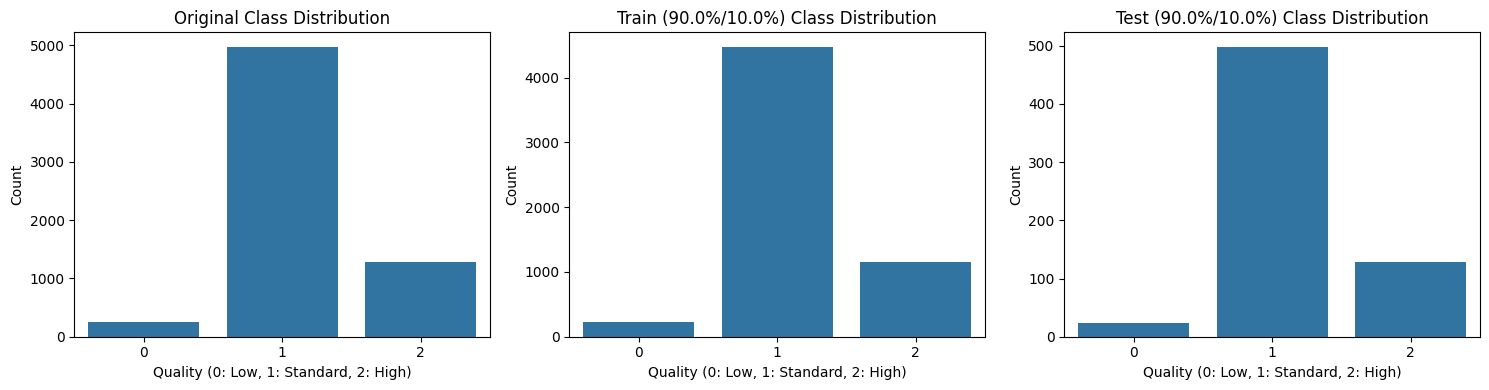


Proportions for 90.0%/10.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.552078
2    19.651103
0     3.796819
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.615385
2    19.692308
0     3.692308
Name: proportion, dtype: float64


In [10]:
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X_wine_scaled, y_wine, train_size=train_size, test_size=test_size, 
        stratify=y_wine, shuffle=True, random_state=42
    )
        
    # Lưu trữ 4 tập hợp
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
        
    # Hiển thị phân phối lớp cho mỗi tập hợp
    plt.figure(figsize=(15, 4))
        
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_wine, order=[0, 1, 2])
    plt.title('Original Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1, 2])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1, 2])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    plt.tight_layout()
    plt.show()
        
    # In thông tin phân phối lớp cho mỗi tập hợp
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", y_wine.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)

Decision Tree (40/60 split)


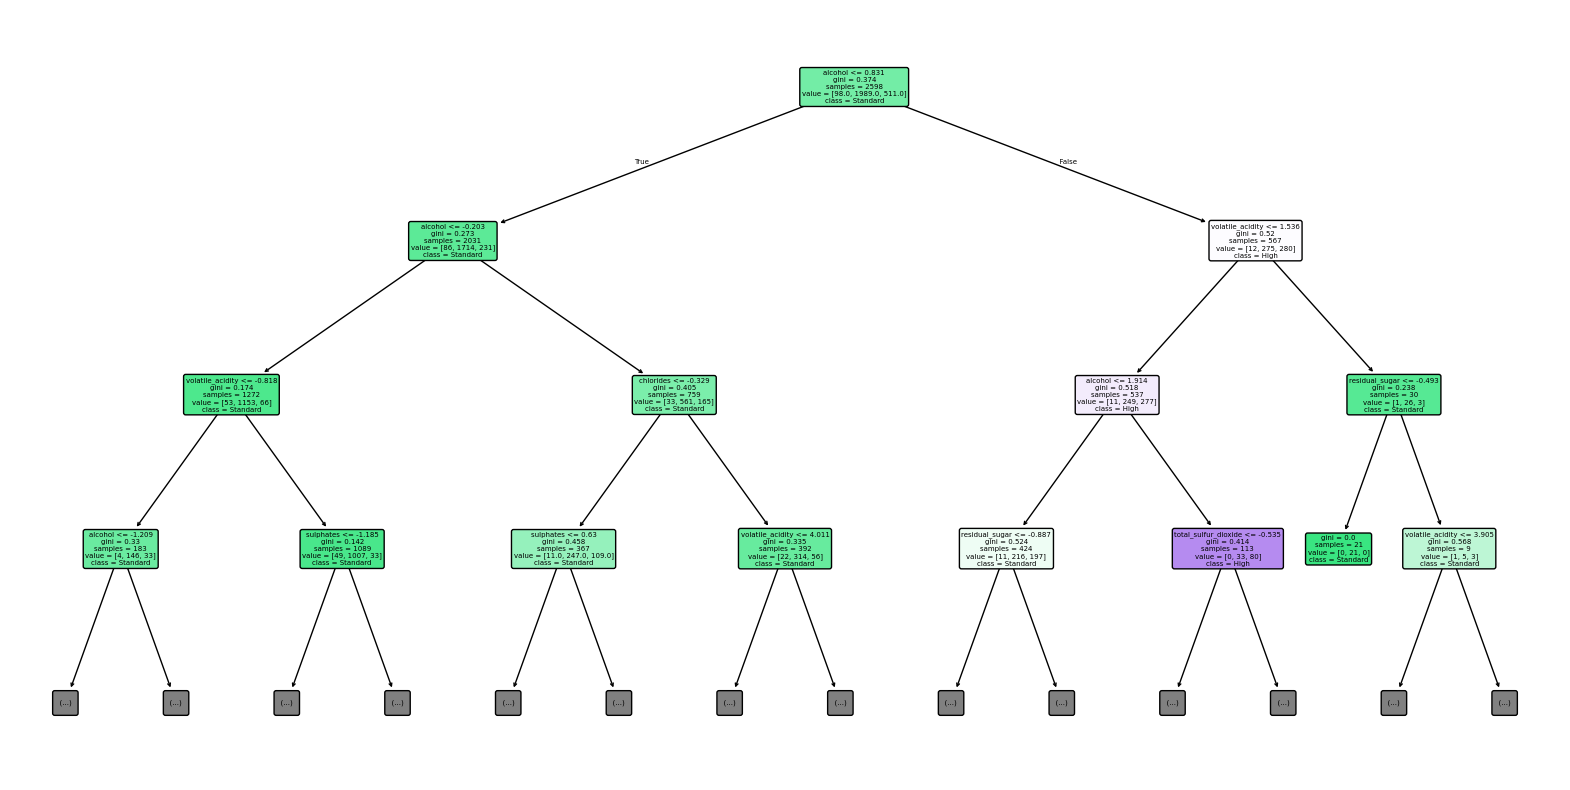

              precision    recall  f1-score   support

         Low       0.18      0.18      0.18       148
    Standard       0.84      0.83      0.83      2985
        High       0.48      0.51      0.49       766

    accuracy                           0.74      3899
   macro avg       0.50      0.51      0.50      3899
weighted avg       0.74      0.74      0.74      3899



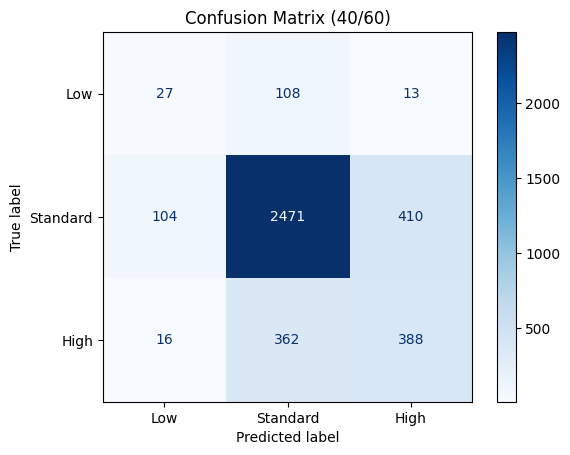

Decision Tree (60/40 split)


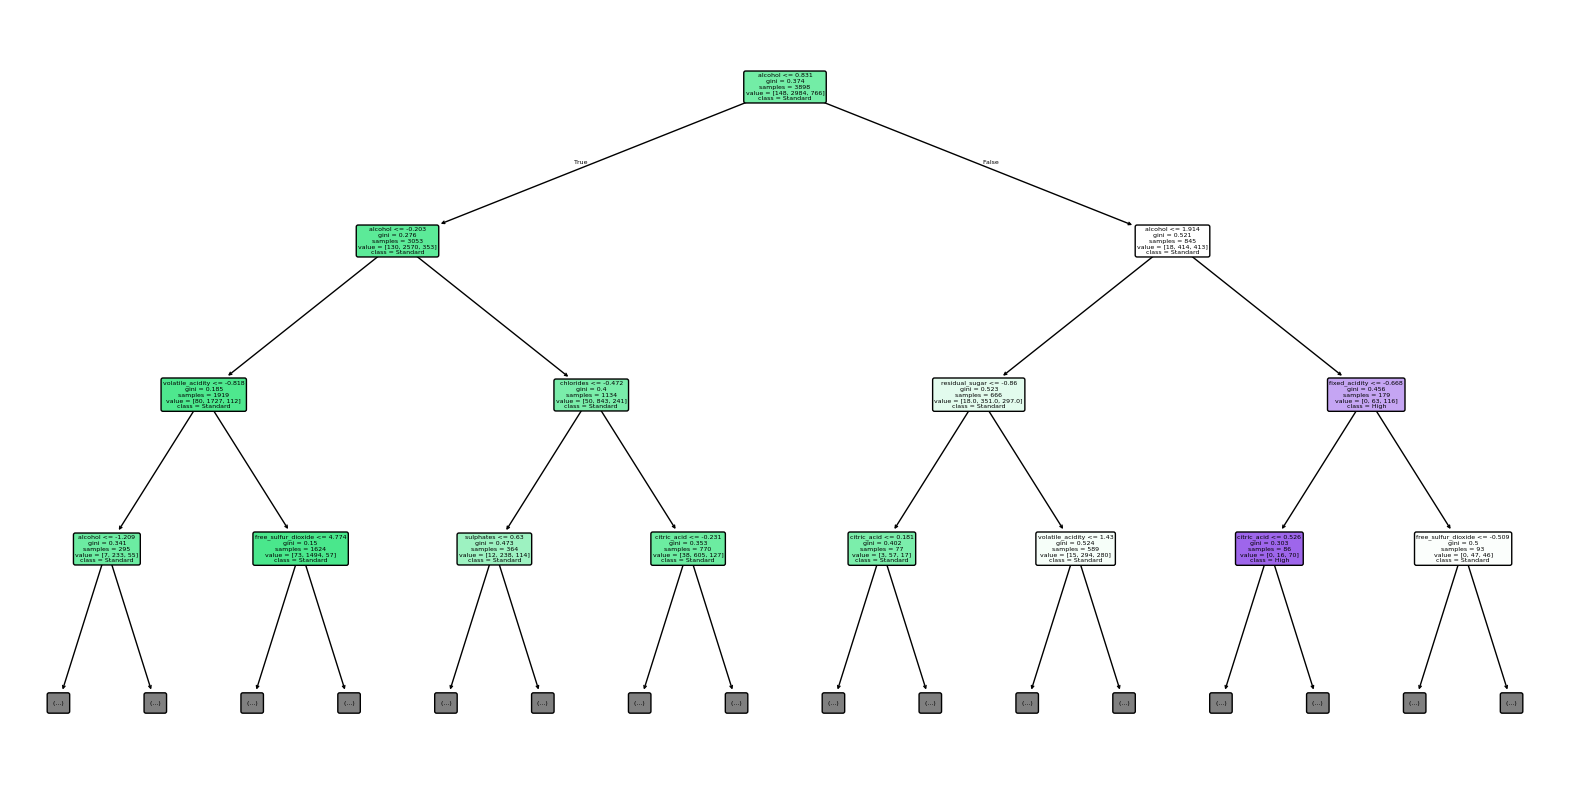

              precision    recall  f1-score   support

         Low       0.28      0.27      0.27        98
    Standard       0.86      0.85      0.85      1990
        High       0.53      0.58      0.55       511

    accuracy                           0.77      2599
   macro avg       0.56      0.56      0.56      2599
weighted avg       0.78      0.77      0.77      2599



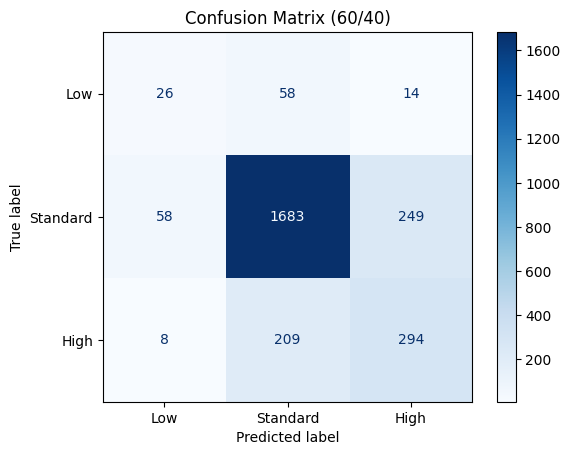

Decision Tree (80/20 split)


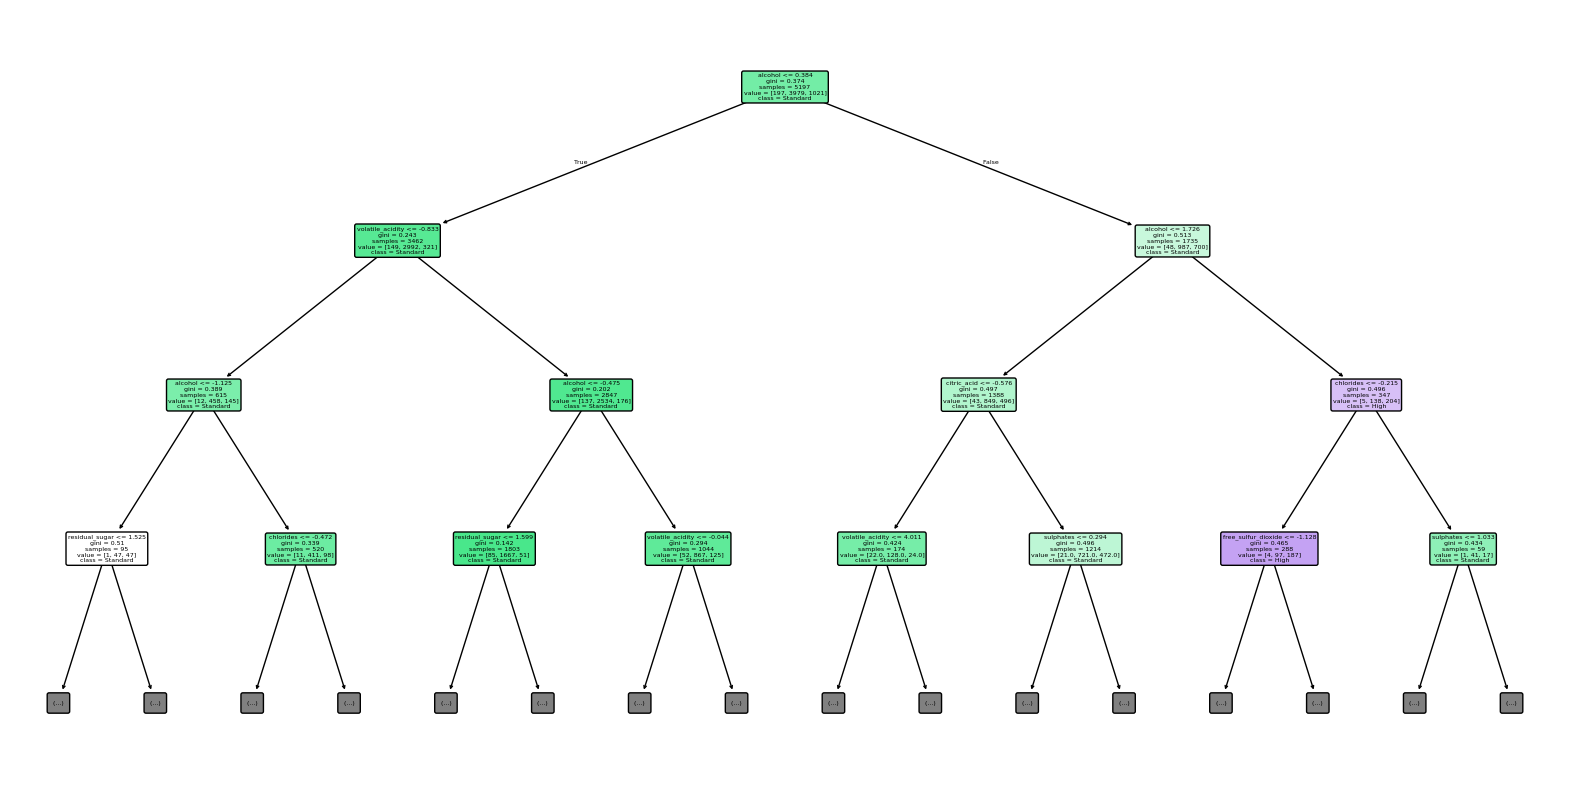

              precision    recall  f1-score   support

         Low       0.30      0.22      0.26        49
    Standard       0.87      0.88      0.88       995
        High       0.60      0.60      0.60       256

    accuracy                           0.80      1300
   macro avg       0.59      0.57      0.58      1300
weighted avg       0.79      0.80      0.80      1300



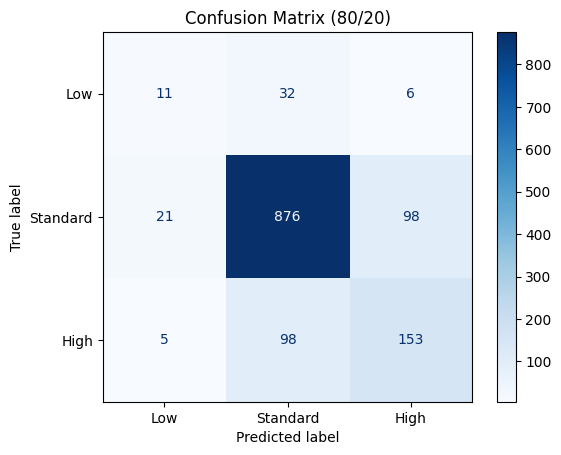

Decision Tree (90/10 split)


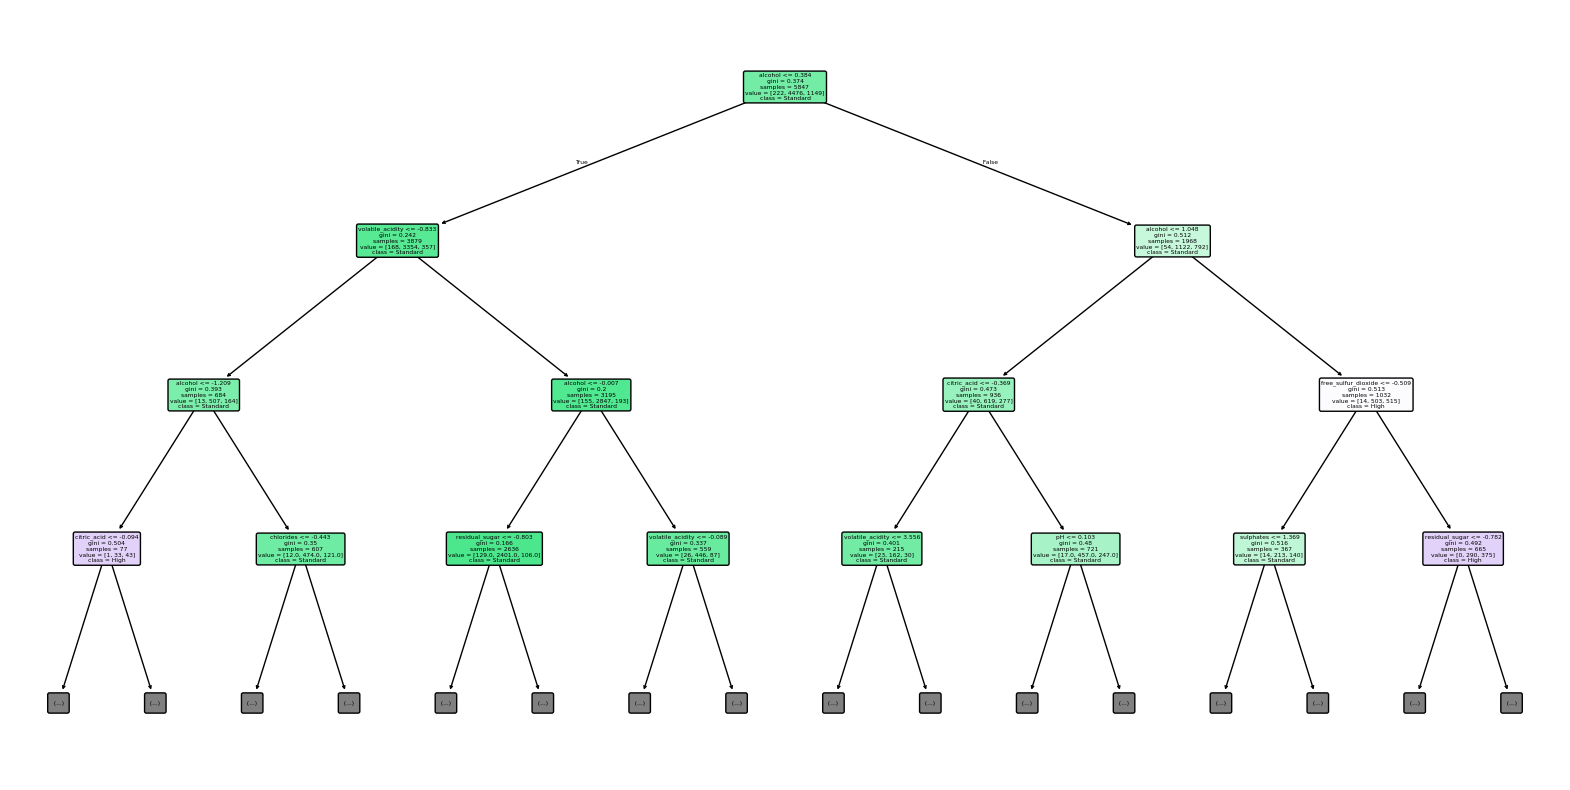

              precision    recall  f1-score   support

         Low       0.29      0.33      0.31        24
    Standard       0.89      0.87      0.88       498
        High       0.60      0.62      0.61       128

    accuracy                           0.80       650
   macro avg       0.59      0.61      0.60       650
weighted avg       0.81      0.80      0.81       650



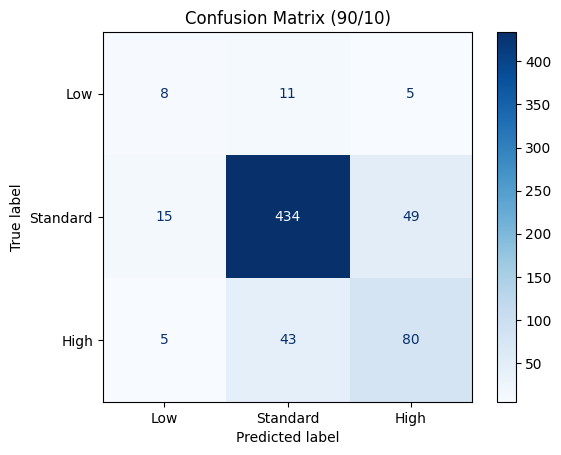

In [11]:

feature_names = list(X_wine.columns)
class_names = ['Low', 'Standard', 'High']

for train_size, test_size in proportions:
    X_train = subsets[f'feature_train_{int(train_size*100)}']
    y_train = subsets[f'label_train_{int(train_size*100)}']
    X_test = subsets[f'feature_test_{int(test_size*100)}']
    y_test = subsets[f'label_test_{int(test_size*100)}']

    clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf.fit(X_train, y_train)

    print(f"Decision Tree ({int(train_size*100)}/{int(test_size*100)} split)")
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, max_depth=3)
    plt.show()

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix ({int(train_size*100)}/{int(test_size*100)})')
    plt.show()

Decision Tree with max_depth=None


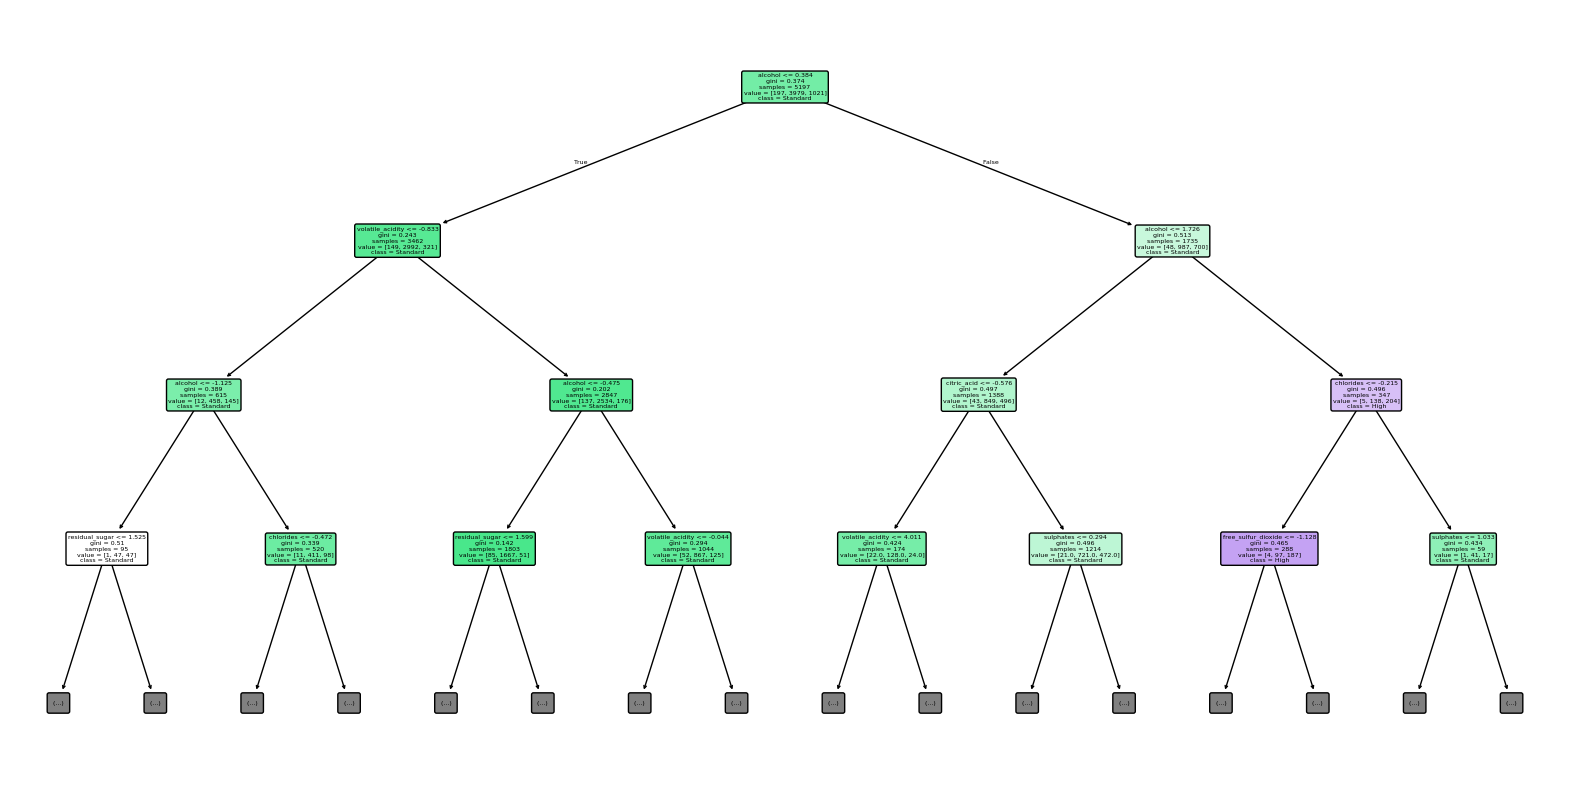

Decision Tree with max_depth=2


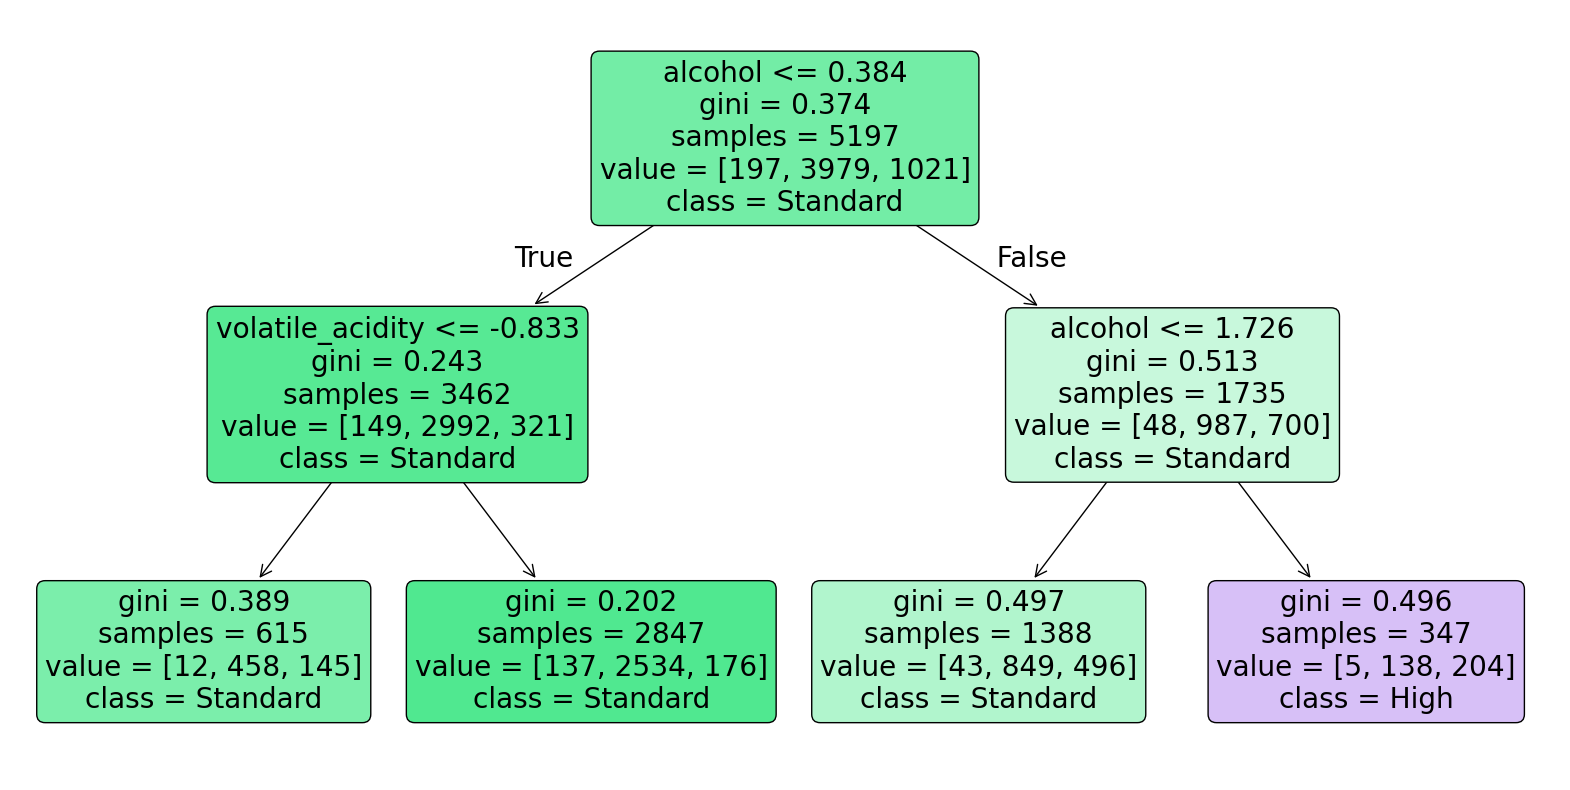

Decision Tree with max_depth=3


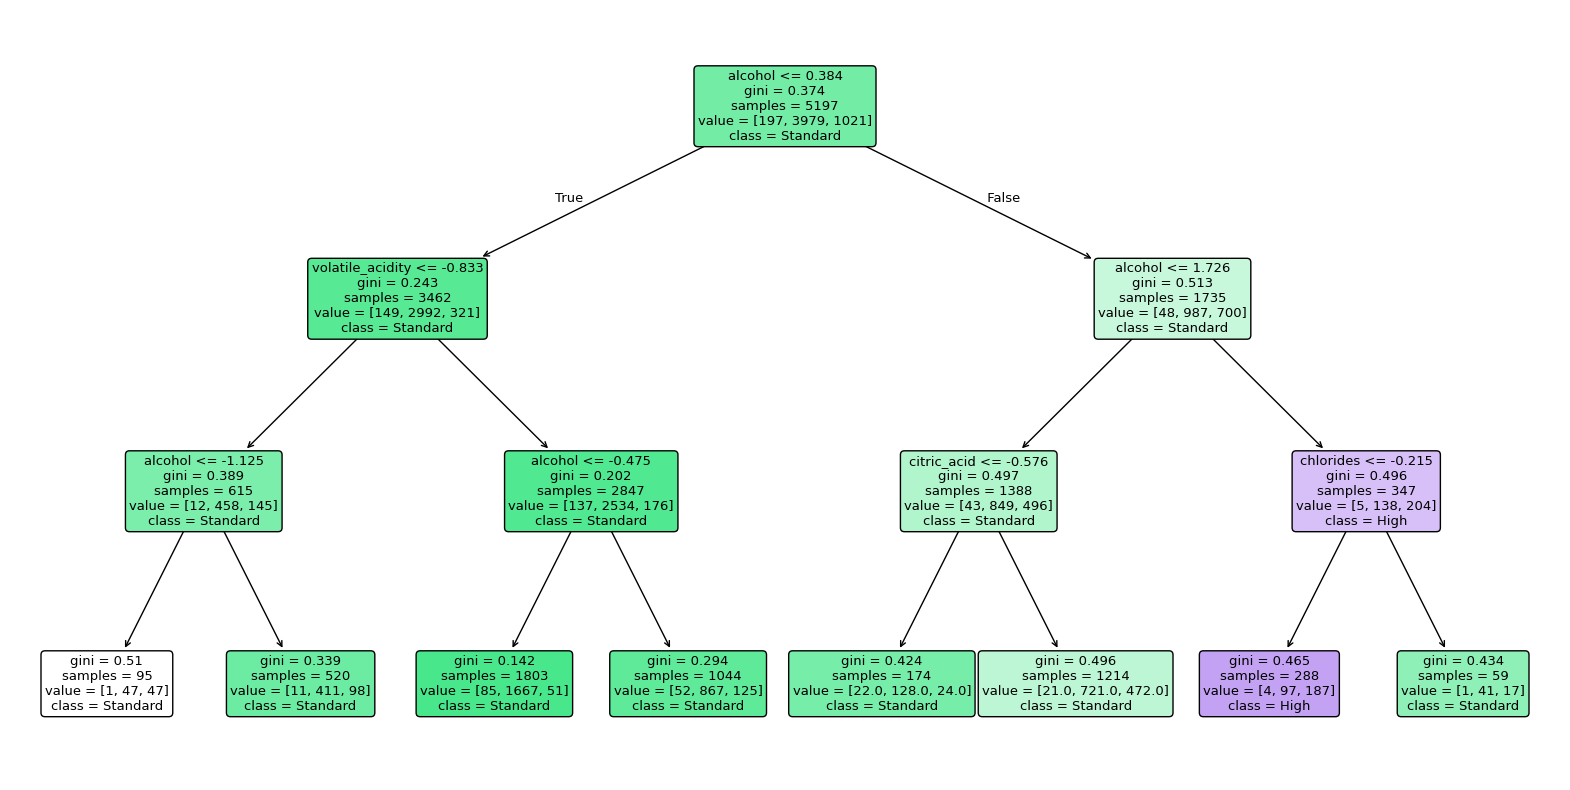

Decision Tree with max_depth=4


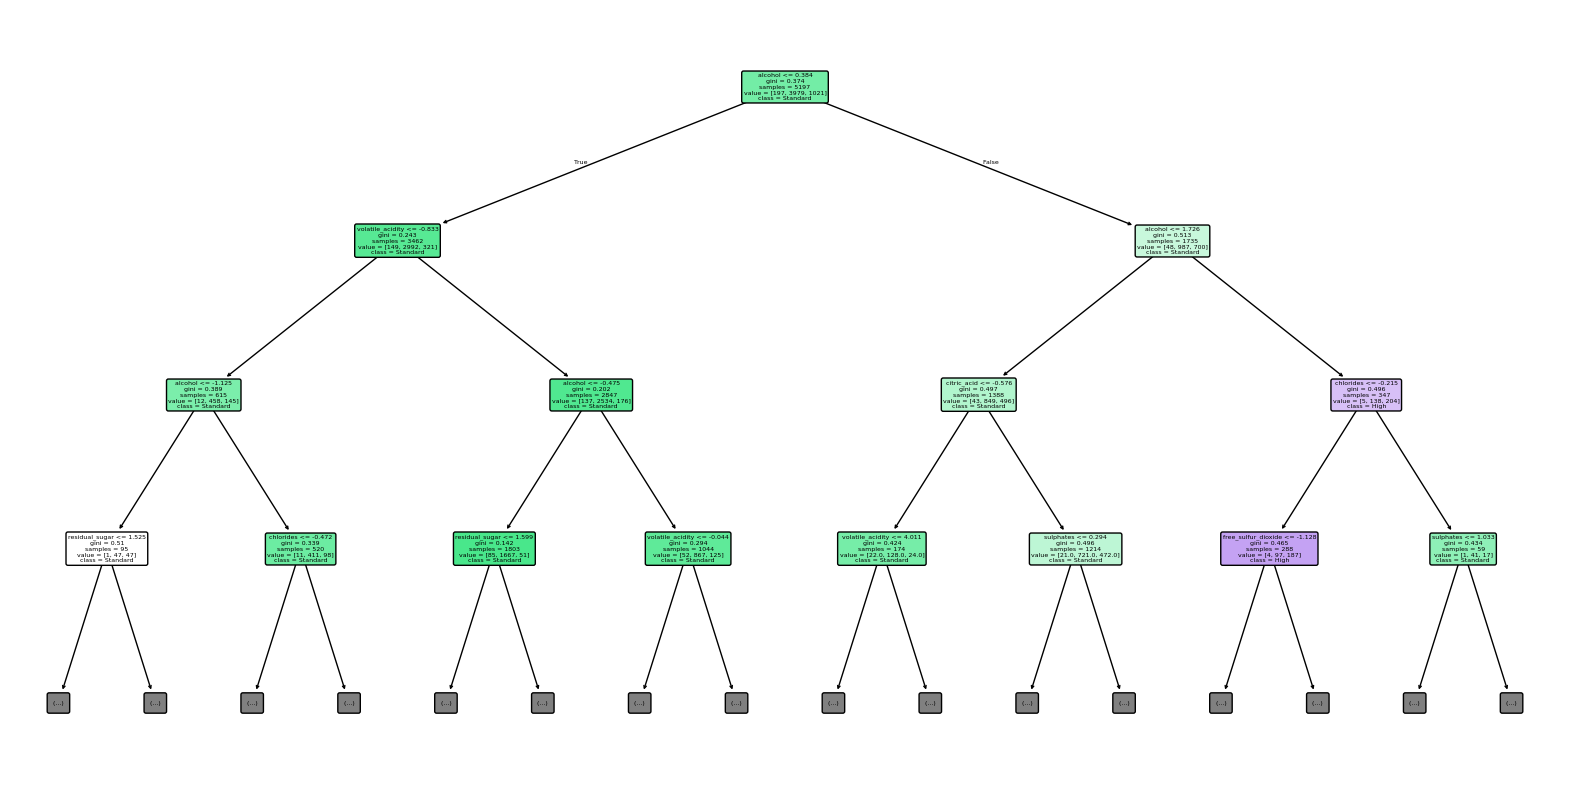

Decision Tree with max_depth=5


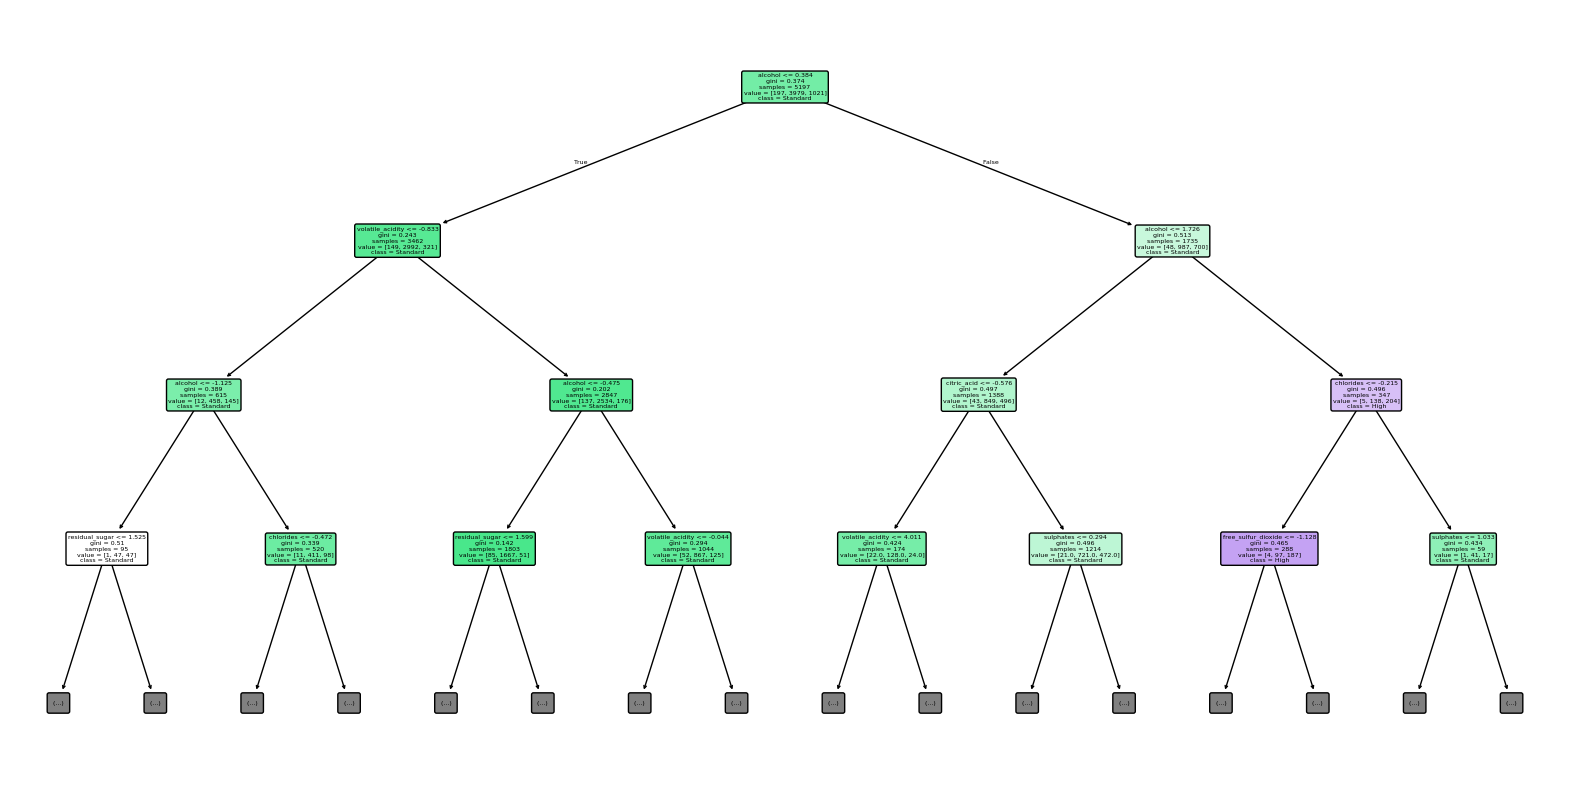

Decision Tree with max_depth=6


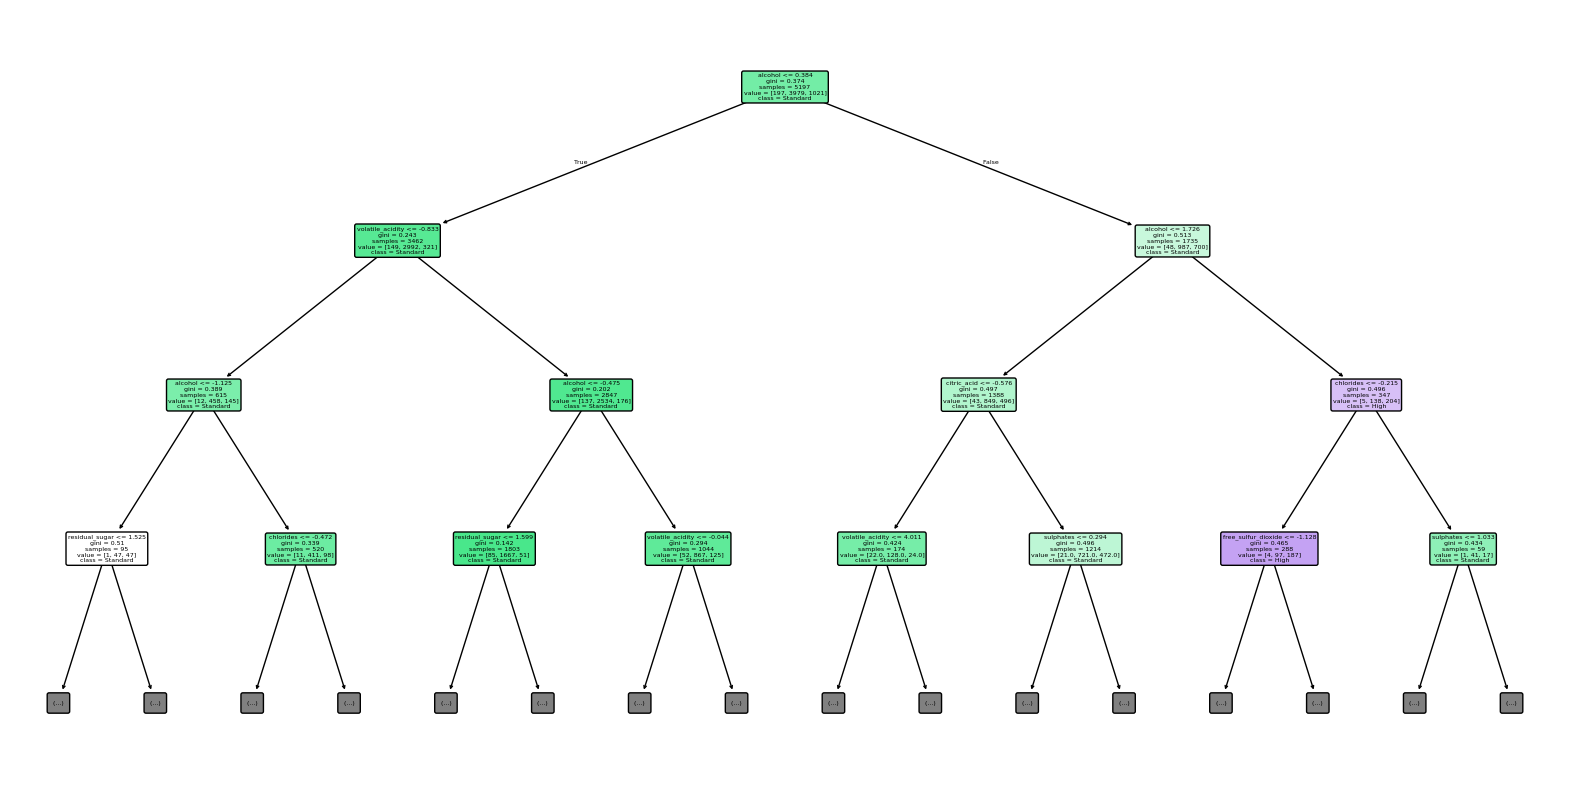

Decision Tree with max_depth=7


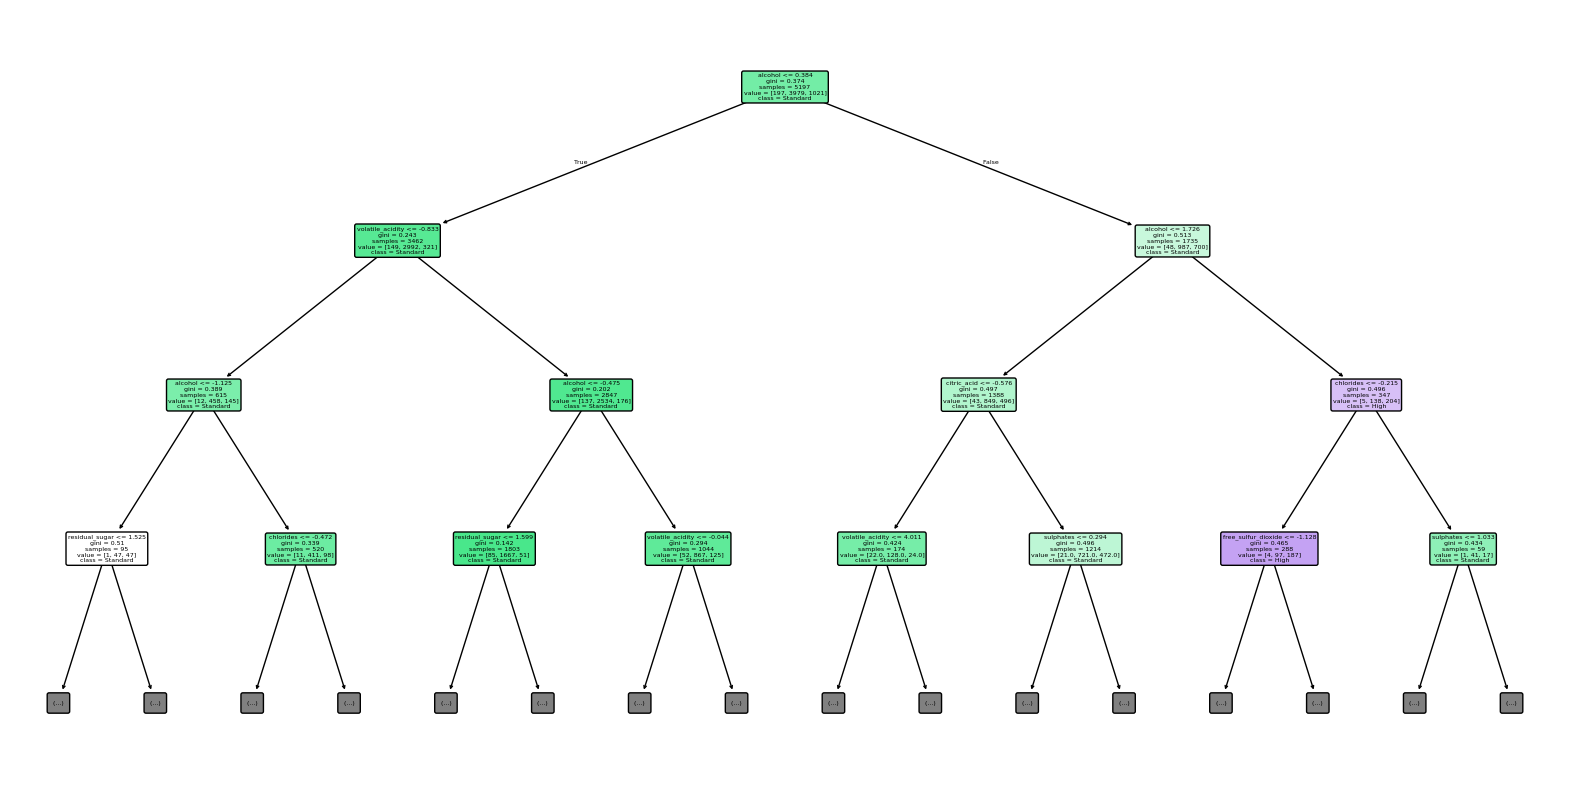

  max_depth  Accuracy
0      None  0.800000
1         2  0.781538
2         3  0.781538
3         4  0.790000
4         5  0.790769
5         6  0.792308
6         7  0.783846


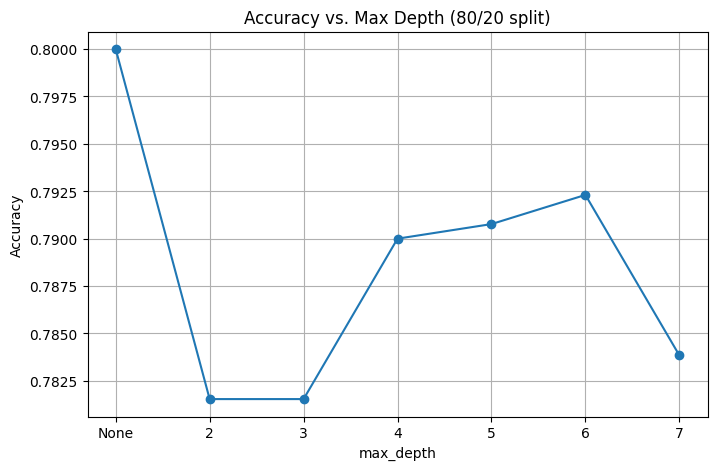

In [12]:

X_train = subsets['feature_train_80']
y_train = subsets['label_train_80']
X_test = subsets['feature_test_20']
y_test = subsets['label_test_20']

max_depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Decision Tree with max_depth={depth}")
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, max_depth=3)
    plt.show()

# Bảng và biểu đồ accuracy
import pandas as pd
accuracy_table = pd.DataFrame({'max_depth': [str(d) if d is not None else 'None' for d in max_depths], 'Accuracy': accuracies})
print(accuracy_table)

plt.figure(figsize=(8, 5))
plt.plot(accuracy_table['max_depth'], accuracy_table['Accuracy'], marker='o')
plt.title('Accuracy vs. Max Depth (80/20 split)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
